In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder,MinMaxScaler, \
    StandardScaler,RobustScaler, PowerTransformer

from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


### Data Read 

In [2]:
# importing the dataset
df=pd.read_csv('sensor_data.csv',na_values="na")

In [3]:
df.shape

(36188, 171)

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [5]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [6]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features)) 
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

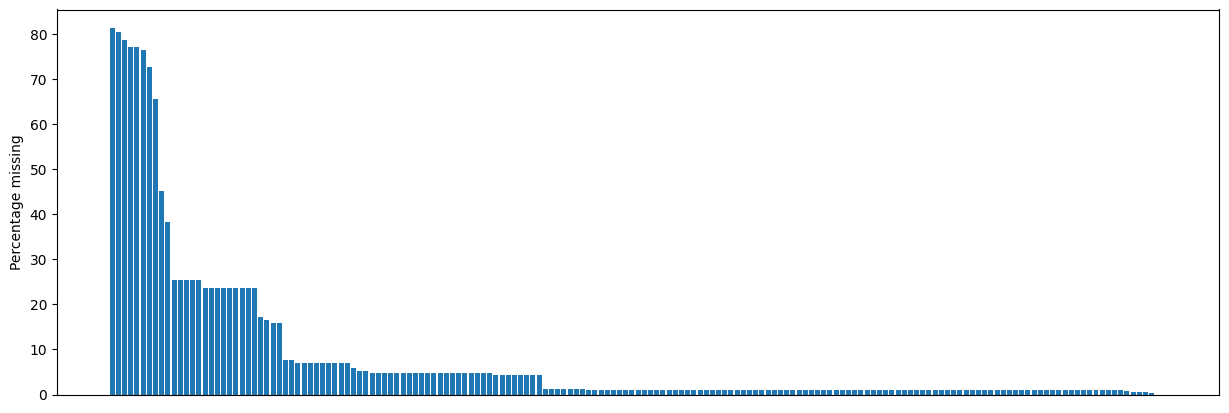

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

Inference:

    There are many Null Values in the dataset

What can be done:

    We can remove the columns with null values or rows with null values.
    We will drop the columns with more than 70% missing/Null values

In [8]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [9]:
dropcols = missing[missing[0]>70]
df.drop(list(dropcols.index), axis=1, inplace=True)

In [10]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(f"Total missing cells in the dataset{round((total_missing/total_cells) * 100,2)}%")

Total missing cells in the dataset5.37%


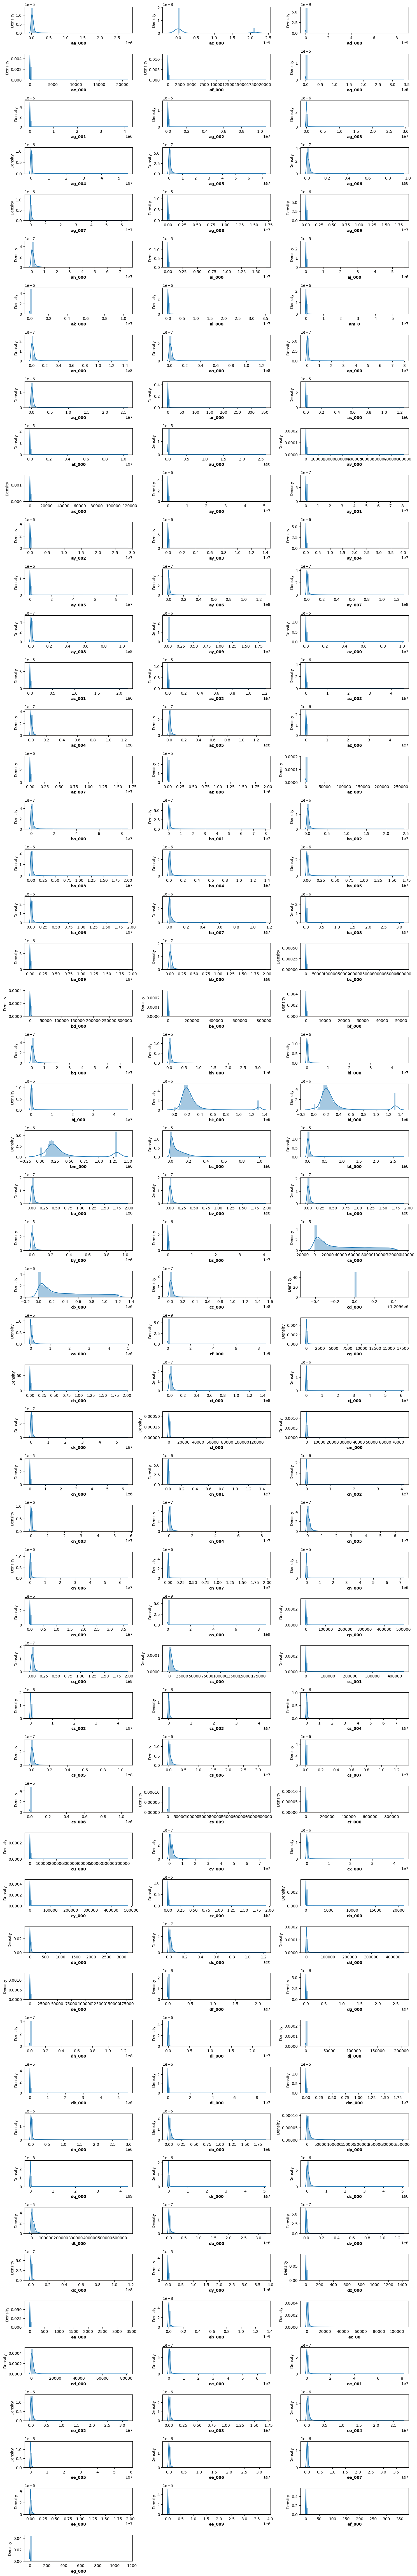

In [11]:
numeric_features = df.iloc[:,1:]
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

Positive: 1000, Negative: 35188


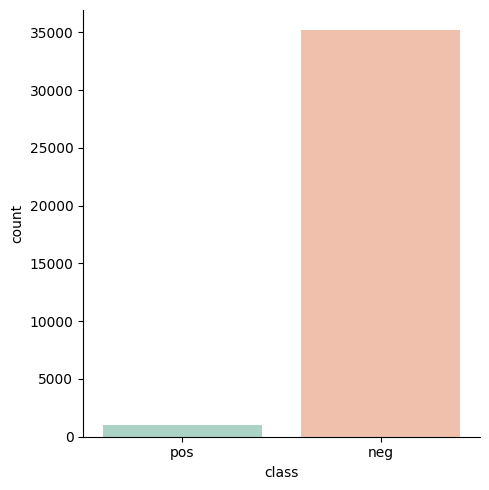

In [12]:
pos = df[df['class']=='pos'].shape[0]
neg = df[df['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x="class", kind="count", palette="Set2", alpha=.6)
plt.show()

#### Analysis:
Inference: 
<ol>
    <li> Unbalanced dataset</li>
    <li> More negatives than positives in the class variable</li>
    <li> Likely to make the model perform worse</li>
    <li> Most Features are not normally distributed</li>
</ol>    


How to fix this:
<ul>
<li> Undersampling : Reduces the size of the data, Equalises both classes</li> 
<li> Oversampling: Same size, equalises the data by creating new data for the smaller class</li> 
</ul>

Preference:

<ul>
<li> SMOTE: Synthetic Minority Oversampling Technique</li> 
<li> Hybrid Methods: Both Undersampling and Oversampling</li>
</ul>

**Oversampling is prefered over undersampling to avoid loss of information**

#### Models

In [15]:
# Function to get performance metrics
def evaluate_clf(t,p):
    # t --> True
    # p --> Predicted
    return accuracy_score(t,p),f1_score(t,p), precision_score(t,p), \
            recall_score(t,p),roc_auc_score(t,p)

In [16]:
# Cost func for model
def cost(t,p):
    # t --> True
    # p --> Predicted
    tn,fp,fn,tp=confusion_matrix(t,p).ravel()
    return (10*fp + 500*fn)

In [17]:
# Model evaluation function. Gets all the necessary information regarding performance of each model

def evaluate_models(X, y, models):
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [18]:
Le=LabelEncoder()
df["class"]=Le.fit_transform(df["class"])

In [19]:
Le.inverse_transform([1,0])

array(['pos', 'neg'], dtype=object)

In [20]:
X= df.drop('class', axis=1)
y= df['class']

In [21]:
RbScaler=RobustScaler()
X1=RbScaler.fit_transform(X)

In [22]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , (scores).mean()))

n_neighbors= 1 || accuracy (0.7501)
n_neighbors= 3 || accuracy (0.7146)
n_neighbors= 5 || accuracy (0.7187)
n_neighbors= 7 || accuracy (0.7118)
n_neighbors= 9 || accuracy (0.7212)


In [26]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=1)),
    ('RobustScaler', RobustScaler())
])

X_knn = knn_pipeline.fit_transform(X)

#### Handling Imbalanced data

In [27]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

#### Initialize Default Models in a dictionary


In [30]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9924
- F1 score: 0.9925
- Precision: 0.9882
- Recall: 0.9967
- Roc Auc Score: 0.9923
- COST: 12340.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9857
- F1 score: 0.9858
- Precision: 0.9814
- Recall: 0.9904
- Roc Auc Score: 0.9856
- COST: 35330.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9838
- F1 score: 0.9838
- Precision: 0.9814
- Recall: 0.9862
- Roc Auc Score: 0.9838
- COST: 198730.
----------------------------------
Model performance for Test set
- Accuracy: 0.9819
- F1 score: 0.9821
- Precision: 0.9790
- Recall: 0.9851
- Roc Auc

In [31]:
report_knn

,Model Name,Cost
6,CatBoosting Classifier,8010
0,Random Forest,12340
1,Decision Tree,35330
5,XGBClassifier,45370
4,K-Neighbors Classifier,49860
2,Gradient Boosting,53990
7,AdaBoost Classifier,79790
3,Logistic Regression,307200


In [32]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [33]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [34]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9917
- F1 score: 0.9918
- Precision: 0.9864
- Recall: 0.9972
- Roc Auc Score: 0.9916
- COST: 10970.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9852
- F1 score: 0.9854
- Precision: 0.9799
- Recall: 0.9911
- Roc Auc Score: 0.9852
- COST: 32940.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9813
- Recall: 0.9867
- Roc Auc Score: 0.9840
- COST: 190760.
----------------------------------
Model performance for Test set
- Accuracy: 0.9810
- F1 score: 0.9812
- Precision: 0.9757
- Recall: 0.9868
- Roc Auc

#### Report for Simple Imputer with median strategy


In [35]:
report_median

,Model Name,Cost
6,CatBoosting Classifier,6230
0,Random Forest,10970
1,Decision Tree,32940
5,XGBClassifier,40140
2,Gradient Boosting,48240
4,K-Neighbors Classifier,54430
7,AdaBoost Classifier,87120
3,Logistic Regression,294030


In [36]:
pip install miceforest

     -------------------------------------- 58.0/58.0 kB 433.8 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 738.8 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 983.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

In [38]:
X_mice = kernel.complete_data()

In [39]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [40]:
# Fit X with Mice imputer 
X_mice= mice_pipeline.fit_transform(X_mice)

In [41]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mice, y)

In [42]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9920
- F1 score: 0.9921
- Precision: 0.9882
- Recall: 0.9960
- Roc Auc Score: 0.9920
- COST: 14840.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9833
- F1 score: 0.9834
- Precision: 0.9797
- Recall: 0.9872
- Roc Auc Score: 0.9833
- COST: 46440.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9854
- F1 score: 0.9854
- Precision: 0.9825
- Recall: 0.9884
- Roc Auc Score: 0.9854
- COST: 166940.
----------------------------------
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9815
- Precision: 0.9772
- Recall: 0.9859
- Roc Auc

#### Report for MICE Imputer algorithm

In [43]:
report_mice

,Model Name,Cost
6,CatBoosting Classifier,8150
0,Random Forest,14840
5,XGBClassifier,45540
1,Decision Tree,46440
2,Gradient Boosting,51120
4,K-Neighbors Classifier,53150
7,AdaBoost Classifier,93290
3,Logistic Regression,202950


In [44]:


# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])



In [45]:
X_const =constant_pipeline.fit_transform(X)

In [46]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [47]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9932
- F1 score: 0.9932
- Precision: 0.9893
- Recall: 0.9972
- Roc Auc Score: 0.9931
- COST: 10760.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9870
- F1 score: 0.9871
- Precision: 0.9814
- Recall: 0.9929
- Roc Auc Score: 0.9870
- COST: 26320.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9830
- F1 score: 0.9830
- Precision: 0.9803
- Recall: 0.9857
- Roc Auc Score: 0.9830
- COST: 205550.
----------------------------------
Model performance for Test set
- Accuracy: 0.9806
- F1 score: 0.9807
- Precision: 0.9770
- Recall: 0.9845
- Roc Auc

#### Report for Simple Imputer with Constant strategy


In [48]:
report_const

,Model Name,Cost
6,CatBoosting Classifier,4980
0,Random Forest,10760
1,Decision Tree,26320
4,K-Neighbors Classifier,43200
5,XGBClassifier,52580
2,Gradient Boosting,56130
7,AdaBoost Classifier,98790
3,Logistic Regression,115500


In [49]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [50]:
X_mean = mean_pipeline.fit_transform(X)

In [51]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [52]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9943
- F1 score: 0.9942
- Precision: 0.9908
- Recall: 0.9977
- Roc Auc Score: 0.9943
- COST: 8640.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: 0.9868
- F1 score: 0.9867
- Precision: 0.9838
- Recall: 0.9896
- Roc Auc Score: 0.9868
- COST: 37130.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9857
- F1 score: 0.9858
- Precision: 0.9828
- Recall: 0.9889
- Roc Auc Score: 0.9857
- COST: 161370.
----------------------------------
Model performance for Test set
- Accuracy: 0.9866
- F1 score: 0.9865
- Precision: 0.9836
- Recall: 0.9893
- Roc Auc 

In [53]:
report_mean

,Model Name,Cost
6,CatBoosting Classifier,5970
0,Random Forest,8640
1,Decision Tree,37130
2,Gradient Boosting,38140
5,XGBClassifier,42020
4,K-Neighbors Classifier,44770
7,AdaBoost Classifier,90980
3,Logistic Regression,301450


In [54]:
from sklearn.decomposition import PCA

In [55]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [57]:
X_pca = pca_pipeline.fit_transform(X)

In [58]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,150):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<AxesSubplot: >

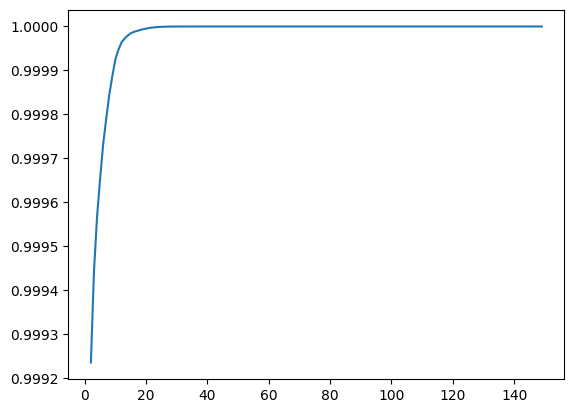

In [59]:
# plotting variance ratio
pd.Series(var_ratio).plot()

In [60]:
pip install kneed


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 500x500 with 0 Axes>

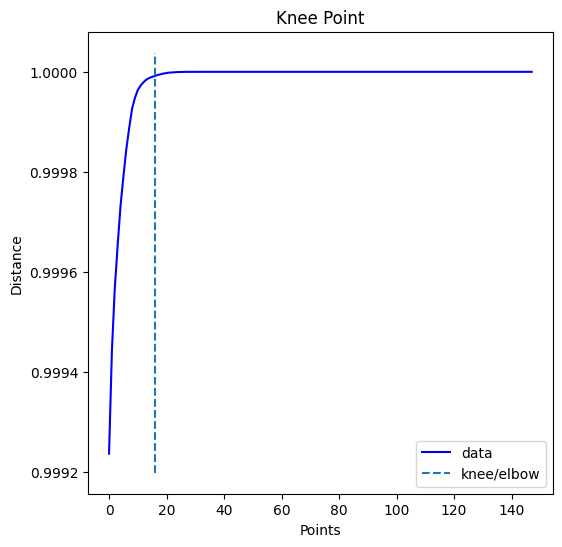

Knee Locator k = 18


In [61]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [62]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=18,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [63]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [64]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 1.0000
- Recall: 0.9971
- Roc Auc Score: 0.9986
- COST: 40000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9840
- F1 score: 0.9840
- Precision: 0.9777
- Recall: 0.9904
- Roc Auc Score: 0.9840
- COST: 35070.


Decision Tree
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 1.0000
- Recall: 0.9971
- Roc Auc Score: 0.9986
- COST: 40000.
----------------------------------
Model performance for Test set
- Accuracy: 0.9737
- F1 score: 0.9737
- Precision: 0.9707
- Recall: 0.9766
- Roc Auc Score: 0.9737
- COST: 83550.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9401
- F1 score: 0.9399
- Precision: 0.9440
- Recall: 0.9357
- Roc Auc Score: 0.9401
- COST: 915030.
----------------------------------
Model performance for Test set
- Accuracy: 0.9439
- F1 score: 0.9436
- Precision: 0.9449
- Recall: 0.9424
-

#### Report for PCA and Mean imputed data

In [65]:
report_pca

,Model Name,Cost
0,Random Forest,35070
6,CatBoosting Classifier,71560
4,K-Neighbors Classifier,77370
1,Decision Tree,83550
2,Gradient Boosting,204330
5,XGBClassifier,219600
7,AdaBoost Classifier,265700
3,Logistic Regression,717710


In [66]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Final Model

In [67]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","Total_cost"]
pt.add_row(["XGBClassifier","Simple Imputer-Constant","2950"])
pt.add_row(["XGBClassifier","Mice","3510"])
pt.add_row(["XGBClassifier","Knn-Imputer","4460"])
pt.add_row(["XGBClassifier","Simple Imputer-Mean","4950"])
pt.add_row(["CatBoostClassifier","Median","5760"])
pt.add_row(["Random Forest","PCA","34150"])
print(pt)

+--------------------+-------------------------+------------+
|       Model        |    Imputation_method    | Total_cost |
+--------------------+-------------------------+------------+
|   XGBClassifier    | Simple Imputer-Constant |    2950    |
|   XGBClassifier    |           Mice          |    3510    |
|   XGBClassifier    |       Knn-Imputer       |    4460    |
|   XGBClassifier    |   Simple Imputer-Mean   |    4950    |
| CatBoostClassifier |          Median         |    5760    |
|   Random Forest    |           PCA           |   34150    |
+--------------------+-------------------------+------------+


Report
<ul>
   <li> From the final report we can see than XGBClassifier with Simple imputer with strategy constant has performed the best with cost of 2950 </li>
</ul>

#### Fitting the Final model and get reports

In [68]:
final_model = XGBClassifier()

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [70]:
print("Final XGBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final XGBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final XGBoost Classifier Accuracy Score (Train) : 0.9840474832454014
Final XGBoost Classifier Accuracy Score (Test) : 0.9814629972907457


In [72]:
print("Final XGBoost Classifier Cost Metric(Test) :",cost(y_test, y_pred))

Final XGBoost Classifier Cost Metric(Test) : 52580


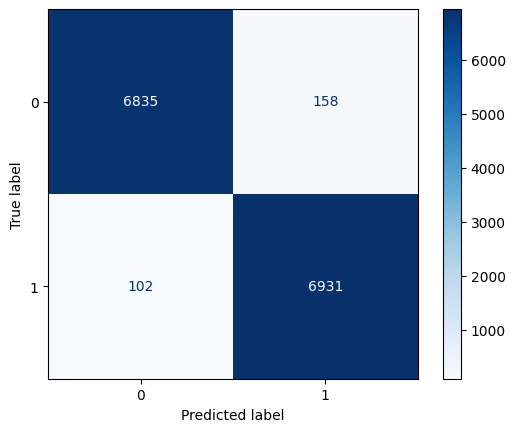

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming final_model is the trained classifier object
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, cmap='Blues', values_format='d')
